<a href="https://colab.research.google.com/github/Joana-Mansa/statistical_learning_linear_regression/blob/main/statistical_learning_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK
- Regression problem using **Linear Regression** and **KNN** to predict the response values for test observations
- Train the data on the models and test using the test.csv file

- train test - 1000 observations
- test set- 100, 9 independent variables

Deliverables:

1. csv file - 100 rows and 2 columns with no header ( first column output values estimated using LR, second column output values estimated with KNN)
2. the python script
3. a 10(max) paged presentation

## Parametric - SIMPLE LINEAR REGRESSION


 1. Estimate the co-efficients
 2. Assess the accuracy of the co-efficients
 - hypothesis testing
 - T-statistic/ p-value
 3. Assessing the Accuracy of the model
 - Residual Standard Error (RSE) - if predictions are close to the true outcome values, then RSE will be small and then the model fits the data well
 - R^2 statistic - the R^2 statistic close to 1 indicates that a large proportion of the the variability in the response is explained by the regression. closer to 0 means that the model does not explain the variability in the response



### Importing Libraries

In [1]:

pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 45.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as variance_inflation_factor
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt


In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from scipy import stats
import seaborn as sns

### Loading the Training Data

In [3]:
# connects the notebook to the my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the data from my drive folder

train_data = pd.read_csv('/content/drive/MyDrive/statistical_learning_files/train_ch.csv')

# drops the column Unamed: 0
train_data.drop(columns='Unnamed: 0', inplace=True)
train_data.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,Y
0,0.914806,1.014918,35.155085,1.159555,4.831515,0.016446,48.003893,1.483346,1.778322,633.287832
1,0.937075,1.183151,44.488785,1.111901,4.873433,0.006909,48.526829,1.501381,-0.091535,1009.843009
2,0.286140,1.169798,33.157725,1.017829,3.572251,0.015664,33.590482,1.494947,-0.431752,561.693065
3,0.830448,1.018381,36.309150,1.259659,4.649813,0.097736,45.965568,1.500261,0.478378,675.239792
4,0.641746,1.115638,35.925711,1.129575,4.292843,0.039882,41.859772,1.492195,1.406363,660.198867


After importing the dataset, a new column had been introduced, called 'Unnamed: 0' . the train_data.drop() code gets rid of that column.

In [5]:
# outputs  the shape (rows, columns)
train_data.shape

(1000, 10)

In [6]:
# outputs the columns/ Features in the data
train_data.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'Y'], dtype='object')

In [7]:
# outputs the top 5 rows within the data
train_data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,Y
0,0.914806,1.014918,35.155085,1.159555,4.831515,0.016446,48.003893,1.483346,1.778322,633.287832
1,0.937075,1.183151,44.488785,1.111901,4.873433,0.006909,48.526829,1.501381,-0.091535,1009.843009
2,0.286140,1.169798,33.157725,1.017829,3.572251,0.015664,33.590482,1.494947,-0.431752,561.693065
3,0.830448,1.018381,36.309150,1.259659,4.649813,0.097736,45.965568,1.500261,0.478378,675.239792
4,0.641746,1.115638,35.925711,1.129575,4.292843,0.039882,41.859772,1.492195,1.406363,660.198867


In [8]:
# outputs the statistical components
# of the data
train_data.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.338564,1.135634,40.077217,1.154935,3.976387,0.049780,39.036728,2.313768,1.633953,836.409215
std,26.889025,0.083101,5.819609,0.087545,0.582922,0.029189,26.403212,25.730261,35.869595,235.927249
min,0.000239,1.000093,30.089582,1.000115,2.998611,0.000060,26.982000,1.483346,-5.564915,464.562867
25%,0.229426,1.061930,35.095138,1.079317,3.454381,0.024176,32.231070,1.496497,-0.485814,629.933062
50%,0.480495,1.134345,40.086305,1.157601,3.963133,0.050404,38.088648,1.500158,0.506148,820.444816
75%,0.744821,1.207314,45.293028,1.233878,4.486086,0.074657,44.116030,1.503756,1.480711,1044.497636
max,850.744002,1.283949,49.982712,1.299949,5.000343,0.099885,845.822992,815.162383,1133.864963,1270.032325


#### Visualising the relationship between the features and the Response column

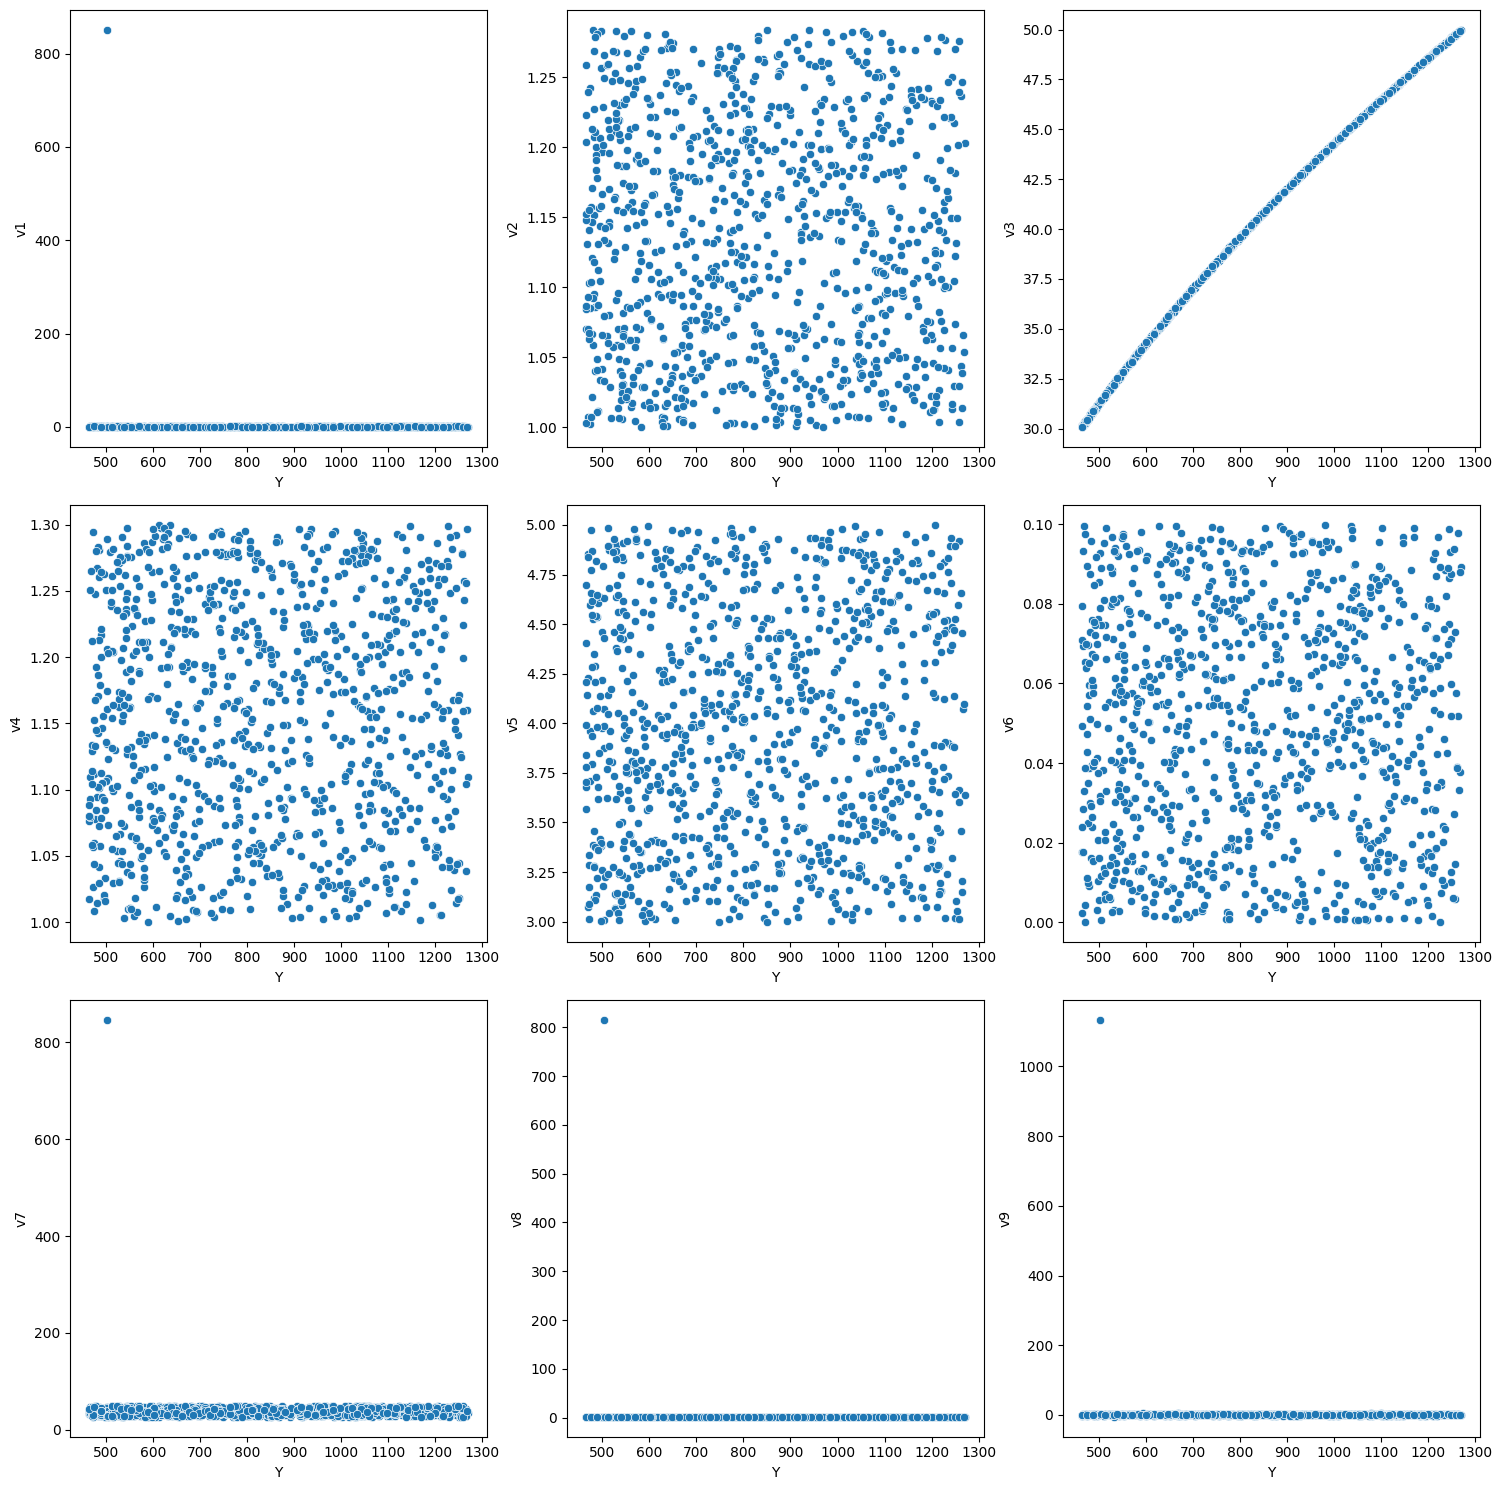

In [9]:
# Define the target column
target_column = 'Y'

# Get the list of columns excluding the target column
columns_to_plot = train_data.columns.drop(target_column)

# Calculate the number of columns excluding the target column
num_columns = len(columns_to_plot)

# Calculate the number of rows required to have 3 plots in each row
num_rows = (num_columns + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and plot it in the corresponding subplot
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=target_column, y=column, data=train_data, ax=axes[i])
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(column)

# Hide any remaining empty subplots
for j in range(num_columns, num_rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. Finding the Co-efficients and Assessing their Accuracy

1. Creating the Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# splits the data into X and Y
# feature and target
# feature
X = train_data.drop(columns=['Y'])

# target
y = train_data['Y']

# splits the training data into training and testing data
# training (80% of the entire set)
# testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)


In [11]:
# adds a column of ones to the data
X_train_with_const = sm.add_constant(X_train)

# specifies the model
model = sm.OLS(y_train, X_train_with_const)

# fits the model
results = model.fit()

sm.OLS() is used to fit ordinary least squares regression models.

In [12]:
from sklearn.metrics import mean_squared_error

# fits the model on the test set
X_test_with_const = sm.add_constant(X_test)

# uses the fitted model to make predictions
# on the test data
y_pred = results.predict(X_test_with_const)

# calculates the mean squared error
# estimates the mse between the predicted values
# and the target values

mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error: ', mse)

# prints the co-efficients of the featu
print('Coefficients:', results.params)

Mean Squared Error:  198.93629050327283
Coefficients: const   -957.331390
v1       -48.407032
v2        -3.146558
v3        40.512739
v4        -5.933297
v5        61.573426
v6        -9.799326
v7        -3.144569
v8        53.442722
v9         0.212683
dtype: float64


In [13]:
print(y_train.size)
print(y_pred.size)

800
200


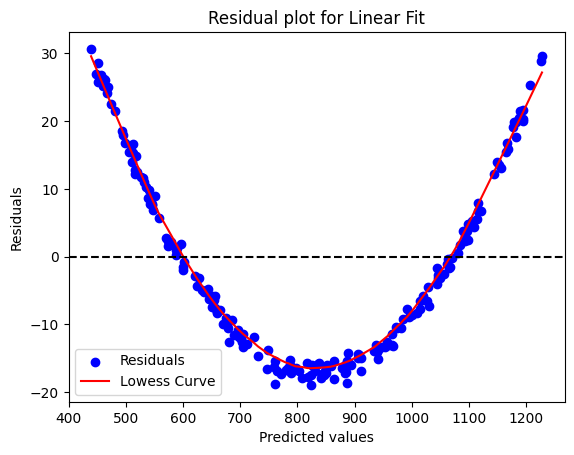

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess

residuals = y_test - y_pred
lowess_curve = lowess(residuals, y_pred, frac=0.3)

plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.plot(lowess_curve[:, 0], lowess_curve[:, 1], color='red', label='Lowess Curve')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot for Linear Fit')
plt.legend()
plt.show()

In [15]:
# printing the predictions made on the test data

new_prediction = {'y_true':y_test, 'y_pred':y_pred}

# creating a dataframe to hold the predictions
df = pd.DataFrame(new_prediction)
df.head()

,y_true,y_pred
521,529.027867,512.396203
737,648.584554,655.007042
740,964.031344,974.592276
660,550.470300,541.979390
411,691.227693,704.566146


In [16]:
# presents the confidence interval for the model

results.conf_int()

,0,1
const,-1405.500075,-509.162704
v1,-215.046686,118.232621
v2,-15.852981,9.559866
v3,40.333078,40.692399
v4,-17.841371,5.974778
v5,-435.524755,558.671606
v6,-45.656680,26.058027
v7,-49.974431,43.685294
v8,-99.780753,206.666196
v9,-0.532912,0.958279


Confidence interval is the probable range within which the estimated coefficient is meant to lie. The interval represents the upper bound and the lower bound.

#### 2. Checking for Correlation between the Error Terms

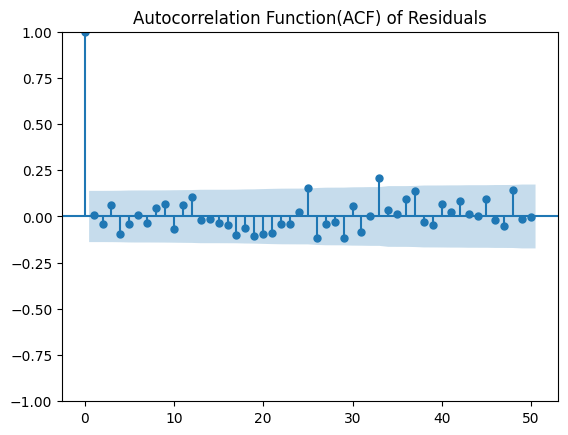

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=50)
plt.title('Autocorrelation Function(ACF) of Residuals')
plt.show()

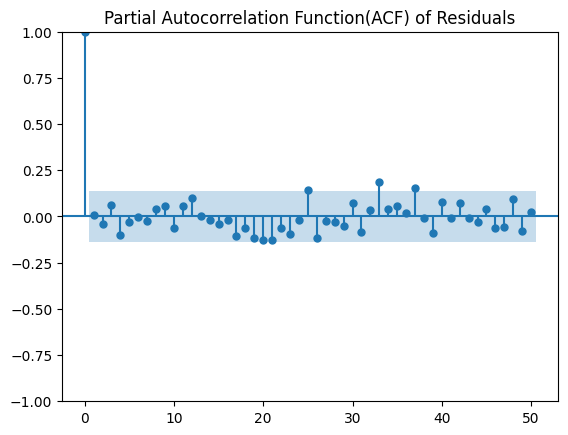

In [18]:
plot_pacf(residuals, lags=50)
plt.title('Partial Autocorrelation Function(ACF) of Residuals')
plt.show()

The shaded region represents the boundaries of the confidence interval. Since there is not a noticeable repetitive pattern within the error terms, we can assume that the error values are not correlated.

#### 3. Non-constant Variance of Error Terms

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_test_with_const)
print('Breusch-Pagan test p-value:', lm_p_value)

Breusch-Pagan test p-value: 0.3985326678686364


The Breusch-Pagan test for heteroscedasticity, the null hypothesis is for homoscedasticity, meaning that the variance of the residuals is constant across all observations.
The p-value is compared with a chosen significance level which is usually 0.05. if the test value is less;
- then we reject the null hypothesis. thus there is evidence of heteroscedasticity

since the p-value is greater than 0.05, we fail to reject the null hypothesis and there is not enough evidence to conclude that the residuals have non-constant variance.

In [20]:
from statsmodels.stats.diagnostic import het_white

lm, lm_p_value, fvalue, f_p_value = het_white(residuals, X_test_with_const)
print('White test p-value', lm_p_value)

White test p-value 0.0019178129775897733


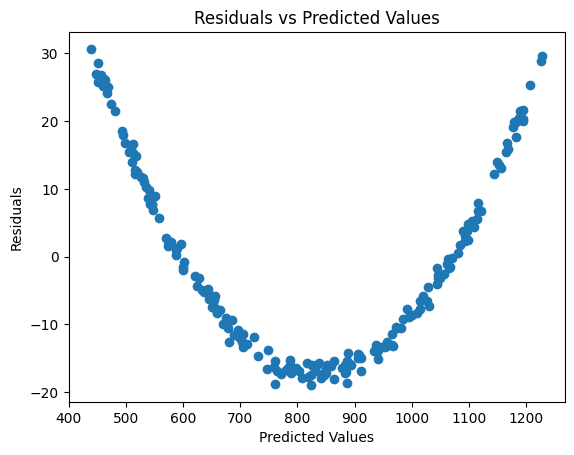

In [21]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

4. #### Outliers and/or high leverage points

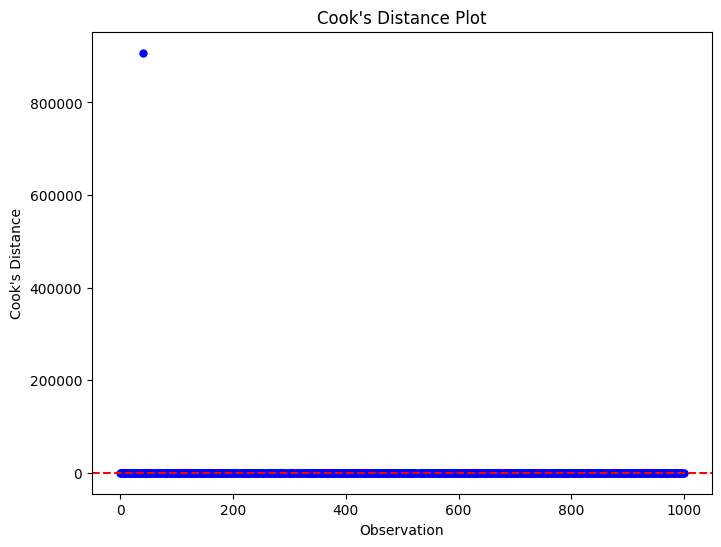

In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(results)
cook_distance = influence.cooks_distance[0]


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(cook_distance, 'bo', linestyle='None', markersize=5)
ax.axhline(y=1, color='r', linestyle='--')
ax.set_xlabel('Observation')
ax.set_ylabel("Cook's Distance")
ax.set_title("Cook's Distance Plot")
plt.show()

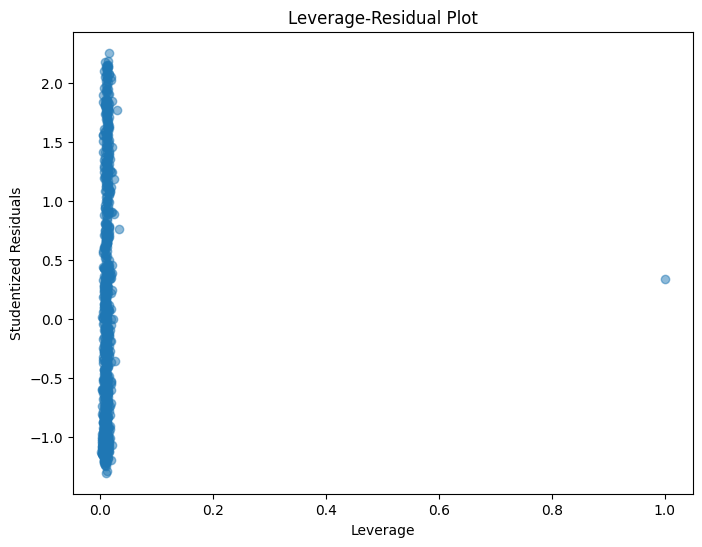

In [23]:
studentized_residuals = influence.resid_studentized_external
# Leverage-Residual plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(influence.hat_matrix_diag, studentized_residuals, alpha=0.5)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title('Leverage-Residual Plot')
plt.show()

#### 5. Collinearity/ Multicollinearity of Predictors

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each predictor variable
vif = [variance_inflation_factor(sm.add_constant(X_train).values, i) for i in range(sm.add_constant(X_train).shape[1])]

# Print the VIF values
for i, col in enumerate(X_train.columns):
    print(f"{col}: VIF = {vif[i]}")

v1: VIF = 183199.15824119645
v2: VIF = 22861207.153008632
v3: VIF = 1.0115952916534214
v4: VIF = 1.0108723320813904
v5: VIF = 1.0031474257701145
v6: VIF = 77847.92992509317
v7: VIF = 1.0054303718062751
v8: VIF = 1719520.8356217437
v9: VIF = 17698896.424319185


VIF values about 5 or 10 indicates instances of multicollinearity. The code below corrects the data and rids it off the predictors with VIF values above 5

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


X = train_data.drop(columns=['Y'])
y = train_data['Y']

# standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
print(vif)



# Identify and remove variables with high VIF
high_vif_features = vif[vif["VIF"] > 5]["Feature"]
X_reduced = X.drop(columns=high_vif_features)

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge.fit(X_train, y_train)

# Evaluate model performance
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print("Ridge Regression Train R^2:", train_score)
print("Ridge Regression Test R^2:", test_score)

VIF values:
  Feature           VIF
0      v1  1.185933e+07
1      v2  1.889164e+02
2      v3  4.871951e+01
3      v4  1.756536e+02
4      v5  3.083863e+06
5      v6  3.931237e+00
6      v7  4.212850e+06
7      v8  5.458014e+06
8      v9  6.160419e+02
Ridge Regression Train R^2: 0.0003701475944640764
Ridge Regression Test R^2: -0.016227664944106213


#### 6. Presence of Single Interraction Term

In [53]:
data = train_data
data['interaction'] = data['v3']*data['v2']
data = sm.add_constant(data)

model = sm.OLS(data['Y'], data[['const', 'v3', 'v2', 'interaction']])
interaction_results = model.fit()

# Print the summary of the regression analysis
print(interaction_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.311e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:02:23   Log-Likelihood:                -4118.6
No. Observations:                1000   AIC:                             8245.
Df Residuals:                     996   BIC:                             8265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -819.7877     45.103    -18.176      

#### Improving the Model Using the Polynomial Features

In [26]:
# improving the model
X_train_poly = np.column_stack((X_train, X_train**2))
X_test_poly = np.column_stack((X_test, X_test**2))

X_train_poly_with_intercept = sm.add_constant(X_train_poly)
model_poly = sm.OLS(y_train, X_train_poly_with_intercept).fit()


# Make predictions on the test set with polynomial features
X_test_poly_with_intercept = sm.add_constant(X_test_poly)
predictions_poly = model_poly.predict(X_test_poly_with_intercept)

# Calculate and print the MSE with polynomial features
mse_poly = mean_squared_error(y_test, predictions_poly)
print("Mean Squared Error on Test Set with Polynomial Features:", mse_poly)

Mean Squared Error on Test Set with Polynomial Features: 52152.168001684964


In [27]:

poly_prediction = {'y_true':y_test, 'y_pred':predictions_poly}

# creating a dataframe to hold the predictions
preds_poly = pd.DataFrame(poly_prediction)
preds_poly.head()

,y_true,y_pred
521,529.027867,847.720625
737,648.584554,844.450534
740,964.031344,837.716949
660,550.470300,845.544358
411,691.227693,832.824847


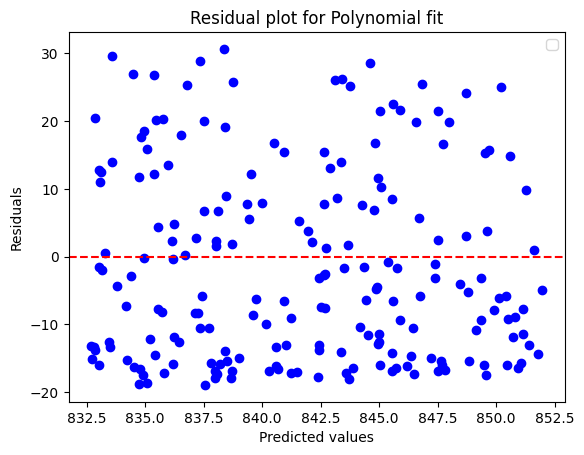

In [28]:
residuals1 = y_test - predictions_poly


plt.scatter(predictions_poly, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot for Polynomial fit')
plt.legend()
plt.show()

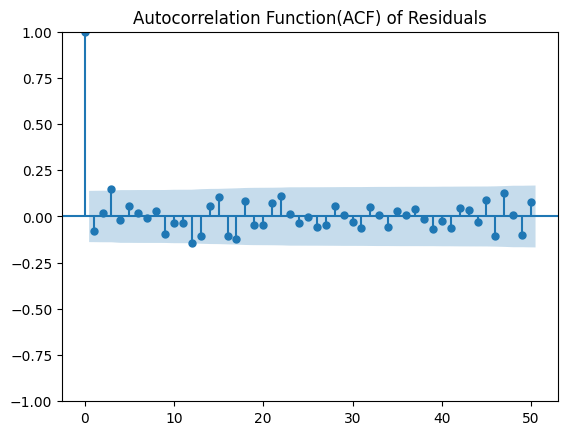

In [29]:
plot_acf(residuals1, lags=50)
plt.title('Autocorrelation Function(ACF) of Residuals')
plt.show()

In [30]:
model_poly.params

const    832.621242
x1       164.634959
x2       298.669345
dtype: float64

In [31]:
summarize(model_poly)

,coef,std err,t,P>|t|
const,832.6212,24.033,34.645,0.000
x1,164.6350,1121.879,0.147,0.883
x2,298.6693,11000.000,0.027,0.978


In [32]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2281
Date:                Mon, 15 Apr 2024   Prob (F-statistic):              0.796
Time:                        01:00:38   Log-Likelihood:                -5512.2
No. Observations:                 800   AIC:                         1.103e+04
Df Residuals:                     797   BIC:                         1.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        832.6212     24.033     34.645      0.000     785.446     879.796
x1           164.6350   1121.879      0.147      0.883   -2037.552    2366.822
x2           298.6693    1.1e+04      0.027      0.978   -2.13e+04    2.19e+04
==============================================================================
Omnibus:                      722.563   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.674
Skew:                           0.097   Prob(JB):                     6.01e-12
Kurtosis:                       1.770   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Assessing the Accuracy of the Co-efficients
- Hypothesis tests:
Null hypothesis H0: there is no relationship between X and Y
Alternate hypotheses H1 : there is a relationship between X and Y

In [33]:
summarize(results)

,coef,std err,t,P>|t|
const,-957.3314,228.311,-4.193,0.000
v1,-48.4070,84.892,-0.570,0.569
v2,-3.1466,6.473,-0.486,0.627
v3,40.5127,0.092,442.643,0.000
v4,-5.9333,6.066,-0.978,0.328
v5,61.5734,253.238,0.243,0.808
v6,-9.7993,18.267,-0.536,0.592
v7,-3.1446,23.857,-0.132,0.895
v8,53.4427,78.057,0.685,0.494
v9,0.2127,0.380,0.560,0.576


Features with the highest t-statistic or lowest P value would be the ideal features to establish a relationship between the response and the predictor. Feature 'v3' has the highest t value and the lowest p value.


Since p-value  of 'v3' is 0.00 we reject the null hypothesis, thus a relationship exists between the predictor v3 and the response Y.


β0 != 0 and β1 != 0

#### 3. Assessing the Accuracy of the Model

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.200e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:00:41   Log-Likelihood:                -3301.2
No. Observations:                 800   AIC:                             6622.
Df Residuals:                     790   BIC:                             6669.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -957.3314    228.311     -4.193      0.000   -1405.500    -509.163
v1           -48.4070     84.892     -0.570      0.569    -215.047     118.233
v2            -3.1466      6.473     -0.486      0.627     -15.853       9.560
v3            40.5127      0.092    442.643      0.000      40.333      40.692
v4            -5.9333      6.066     -0.978      0.328     -17.841       5.975
v5            61.5734    253.238      0.243      0.808    -435.525     558.672
v6            -9.7993     18.267     -0.536      0.592     -45.657      26.058
v7            -3.1446     23.857     -0.132      0.895     -49.974      43.685
v8            53.4427     78.057      0.685      0.494     -99.781     206.666
v9             0.2127      0.380      0.560      0.576      -0.533       0.958
==============================================================================
Omnibus:                      148.829   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.250
Skew:                           0.598   Prob(JB):                     4.57e-17
Kurtosis:                       2.092   Cond. No.                     3.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
results.params

const   -957.331390
v1       -48.407032
v2        -3.146558
v3        40.512739
v4        -5.933297
v5        61.573426
v6        -9.799326
v7        -3.144569
v8        53.442722
v9         0.212683
dtype: float64

### Testing the Model with the Training Set

In [36]:
test_data = pd.read_csv('/content/drive/MyDrive/statistical_learning_files/test_ch.csv')
test_data.drop(columns='Unnamed: 0', inplace=True)
test_data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,0.848293,1.158823,40.233880,1.288629,4.675941,0.049711,46.309129,1.504843,1.083468
1,0.062746,1.114265,31.019324,1.148471,3.132265,0.046089,28.536406,1.501553,1.570351
2,0.819845,1.180383,49.469255,1.037676,4.648054,0.032193,45.943751,1.505126,-0.458661
3,0.539360,1.168887,33.160926,1.072893,4.079943,0.034557,39.411746,1.505863,-0.013772
4,0.499020,1.133695,45.976945,1.042067,3.990158,0.023441,38.399435,1.501198,-0.255321


In [37]:
test_data.shape

(100, 9)

In [38]:
new_data_with_const = sm.add_constant(test_data)
LR_predictions = results.predict(new_data_with_const)
LR_predictions_df = pd.DataFrame({'Linear Regression Predicted': LR_predictions})
LR_predictions_df.head()
# print('Predictions: ', predictions)

,Linear Regression Predicted
0,842.755456
1,469.247716
2,1218.994713
3,557.374897
4,1076.296507


In [39]:
# saves the predictions to the file
# without an index column - index=False
# without a header - header = False
LR_predictions_df.to_csv('0081921_OWUSU-APPIAH_chal1.csv', index=False, header=False)

## Non-Parametric Method: K-Nearest Neighbors

Non-parametric methods do not assume a linear relationship between the predictor and the response

In [40]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#### Data Preparation

In [41]:
X = train_data.drop(columns=['Y'])
y = train_data['Y']

print(y.dtype)

float64


In [42]:
# when k = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
k = 1
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 454.9550809452578


In [43]:
results_df = pd.DataFrame({'Original': y_test, 'Predicted':y_pred})
results_df.to_csv('predictions1.csv', index=False)

In [44]:
# when k = 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
k = 2
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 342.49220499924655


In [45]:

results_df = pd.DataFrame({'Original': y_test, 'Predicted':y_pred})
results_df.to_csv('predictions2.csv', index=False)

In [46]:
# when k = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 249.350797294358


In [47]:
results_df = pd.DataFrame({'Original': y_test, 'Predicted':y_pred})
results_df.to_csv('predictions4.csv', index=False)

Alternating the k values, the higher the k values, the lesser the MSE value and the closer the predicted values were to the original Y- values

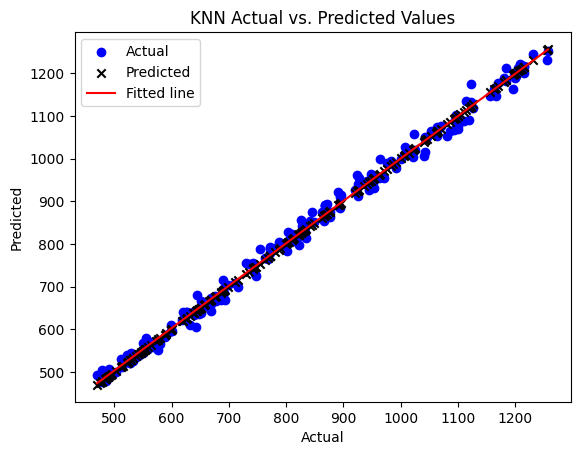

In [48]:
plt.scatter(y_test, y_pred, color='blue', marker = 'o', label='Actual')
plt.scatter(y_test, y_test, color='black', marker = 'x', label='Predicted')


plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),
         color='red', label='Fitted line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Actual vs. Predicted Values')
plt.legend()
plt.show()

####  Fitting the KNN model on the Actual Test data

In [49]:
knn_prediction = knn_regressor.predict(test_data)
# fresh_df = pd.DataFrame({'Predicted':y_pred})
# fresh_df.to_csv('0081921_OWUSU-APPIAH_chal1.csv', index=False)
print(knn_prediction)

[ 807.20731444  492.24501333 1236.88527377  565.81787843 1074.31465993
  547.62413625  780.6349251   567.27659104 1027.39011974 1067.6849969
 1227.42319244  483.38620582  889.39738905  752.19121458  633.40957744
  695.45359643 1205.24826765 1174.01007974 1235.82169245 1080.50942326
  537.67024682  647.22191851 1029.01840714 1080.50942326  866.01261946
  568.44036663 1038.01607449  520.42243355 1022.93918475 1112.46903344
  811.04105489  866.97722029  981.4001015   490.22821902  536.14633409
  965.82497643  510.1949708   648.75467471 1057.26276181  695.68017534
  846.2714132  1168.46120765  756.06851126  676.55490323  505.79371952
  723.43256221  651.66008987  657.5685547   842.17577048  944.74799462
  686.75352138  966.4334009   824.42270244 1033.03214891  925.09581694
  824.70225757  767.75008175  676.4670588   946.20763305  467.48736278
  747.2330177  1082.90622319  713.43852983 1107.54425517  743.51435166
 1014.09147    1052.7834912   680.90906345 1091.91919018 1095.82809811
 1242.3

In [50]:
knn_prediction_df = pd.DataFrame({'KNN Predicted': knn_prediction})
knn_prediction_df.to_csv('0081921_OWUSU-APPIAH_chal1.csv', index=False)

In [51]:
import os
df_combined = pd.concat([LR_predictions_df, knn_prediction_df], axis=1)
csv_file_path = '0081921_OWUSU-APPIAH_chal1.csv'
df_combined.to_csv(csv_file_path, mode='a', index=False, header=False)